In [13]:
from pygo import optimization_problem as op
from pygo import global_optimizers as go
import matplotlib.pyplot as plt
import numpy as np

## Particle Swarm Optimization Examples
Here we demonstrate how to use the particle swarm optimization using a number of well known optimization test functions. There are currently 2 variations of particle swarm
- pso - the most basic form of particle swarm optimization in which we have constant inertia
- adaptive_pso - a variation of the basic pso in which we have adaptive inertia that drops linearly from somme initial value to $0.4$

The well knowns used optimization test functions are
- Booth function
- Matyas funcion
- Rosenbrock function (2d)
- Mccormick function
- Easom function
- Bukin function
- Drop wave function
- Rastrigin function

These were adapted from [https://www.sfu.ca/~ssurjano/optimization.html]()

### Booth function
$$f(\textbf {x}) = (x_1+2x_2-7)^2+(2x_1+x_2-5)^2$$
<b>Input Domain</b>
$x_i \in [-10,10]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(1,3),f(\textbf{x}^*)=0$  

Minimize 
lambda x:(x[:,0]+2*x[:,1]-7)**2+(2*x[:,0]+x[:,1]-5)**2
Subject to
-10<= x0 <=10
-10<= x1 <=10

x* [1.00019617 2.99979903]
f(x*) 7.896159641309791e-08


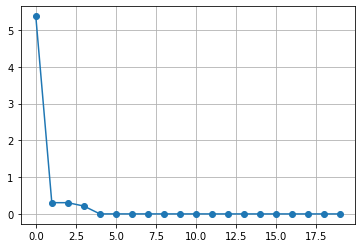

In [11]:
opp = op.OptimizationProblem('lambda x:(x[:,0]+2*x[:,1]-7)**2+(2*x[:,0]+x[:,1]-5)**2','min',
                              [-10,-10],[10,10])
global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star,x_path, y_path = global_optimizer.pso(opp,w=0.2,trajectory=True)
print('x*',x_star)
print('f(x*)',f_star)
x = np.arange(len(x_path))
plt.plot(x,y_path,marker='o')
plt.grid()

### Matyas function
$$f(\textbf {x}) = 0.26(x_1^2+x_2^2)-0.48x_1x_2$$
<b>Input Domain</b>
$x_i \in [-10,10]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(0,0),f(\textbf{x}^*)=0$  

In [12]:
opp = op.OptimizationProblem('lambda x:0.26*(x[:,0]**2+x[:,1]**2)-0.48*x[:,0]*x[:,1]','min',
                              [-10,-10],[10,10])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.adaptive_pso(opp,N=200)
print('x*',x_star)
print('f(x*)',f_star)


Minimize 
lambda x:0.26*(x[:,0]**2+x[:,1]**2)-0.48*x[:,0]*x[:,1]
Subject to
-10<= x0 <=10
-10<= x1 <=10

x* [-9.44941783e-06 -1.32473775e-05]
f(x*) 8.757569551708249e-12


### Rosenbrock function (2d)
$$f(\textbf {x}) = (a-x_1)^2 + b(x_2-x_1^2)^2$$
Choose $a=1,b=100$ <br></br>
<b>Input Domain</b>
$x_i \in [-5,10]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(1,1),f(\textbf{x}^*)=0$ 

In [4]:
opp = op.OptimizationProblem('lambda x:(1-x[:,0])**2 + 100*(x[:,1]-x[:,0]**2)**2','min',
                              [-5,-5],[10,10])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.adaptive_pso(opp,w_init=0.99,N=300)
print('x*',x_star)
print('f(x*)',f_star)

Minimize 
lambda x:(1-x[:,0])**2 + 100*(x[:,1]-x[:,0]**2)**2
Subject to
-5<= x0 <=10
-5<= x1 <=10

x* [1.00321847 1.00653112]
f(x*) 1.1061113369456016e-05


### Mccormick function
$$f(\textbf {x}) = sin(x_1+x_2)+(x_1-x_2)^2-1.5x_1+2.5x_2+1$$
<b>Input Domain</b>
$x_1 \in [-1.5,4],x_2 \in [-3,4]$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(-0.54719,-1.54719),f(\textbf{x}^*)=-1.9133$ 

In [5]:
opp = op.OptimizationProblem('lambda x:np.sin(x[:,0]+x[:,1])+(x[:,0]-x[:,1])**2-1.5*x[:,0]+2.5*x[:,1]+1','min',
                              [-1.5,-3],[4,4])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.adaptive_pso(opp,tol=1e-4)
print('x*',x_star)
print('f(x*)',f_star)

Minimize 
lambda x:np.sin(x[:,0]+x[:,1])+(x[:,0]-x[:,1])**2-1.5*x[:,0]+2.5*x[:,1]+1
Subject to
-1.5<= x0 <=4
-3.0<= x1 <=4

x* [-0.54717013 -1.54720944]
f(x*) -1.9132229533308656


### Easom function
$$f(\textbf {x}) = -cos(x_1)cos(x_2)exp(-(x_1-\pi)^2-(x_2-\pi)^2)$$
<b>Input Domain</b>
$x_i \in [-100,100]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(\pi,\pi),f(\textbf{x}^*)=-1$ 

In [6]:
opp = op.OptimizationProblem('lambda x:-np.cos(x[:,0])*np.cos(x[:,1])*np.exp(-(x[:,0]-np.pi)**2-(x[:,1]-np.pi)**2)',
                          'min',[-100,-100],[100,100])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.pso(opp,N=500,tol=1e-4)
print('x*',x_star)
print('f(x*)',f_star)

Minimize 
lambda x:-np.cos(x[:,0])*np.cos(x[:,1])*np.exp(-(x[:,0]-np.pi)**2-(x[:,1]-np.pi)**2)
Subject to
-100<= x0 <=100
-100<= x1 <=100

x* [3.14165347 3.14166809]
f(x*) -0.9999999859170721


### Bukin function
$$f(\textbf {x}) = 100\sqrt{|x_2-0.01x_1^2|}+0.01|x_1+10|$$
<b>Input Domain</b>
$x_1 \in [-15,-3],x_2 \in [-5,3]$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(-10,1),f(\textbf{x}^*)=0$ 

In [7]:
opp = op.OptimizationProblem('lambda x:100*np.sqrt(abs(x[:,1]-0.01*x[:,0]**2))+0.01*abs(x[:,0]+10)',
                          'min',[-15,-3],[-5,3])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.adaptive_pso(opp)
print('x*',x_star)
print('f(x*)',f_star)

Minimize 
lambda x:100*np.sqrt(abs(x[:,1]-0.01*x[:,0]**2))+0.01*abs(x[:,0]+10)
Subject to
-15<= x0 <=-5
-3<= x1 <=3

Failed to converge after 300 iterations
x* [-13.38264314   1.79095161]
f(x*) 0.08209662344855548


### Drop Wave function
$$f(\textbf {x}) = -\frac{1+cos(12\sqrt{x_1^2+x_2^2})}{0.5(x_1^2+x_2^2)+2}$$
<b>Input Domain</b>
$x_i \in [-5.12,5.12]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(0,0),f(\textbf{x}^*)=-1$ 

In [8]:
opp = op.OptimizationProblem('lambda x:-1*(1+np.cos(12*(np.sqrt(x[:,0]**2 + x[:,1]**2))))/(0.5*(x[:,0]**2+x[:,1]**2)+2)',
                          'min',[-5.12,-5.12],[5.12,5.12])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.adaptive_pso(opp)
print('x*',x_star)
print('f(x*)',f_star)

Minimize 
lambda x:-1*(1+np.cos(12*(np.sqrt(x[:,0]**2 + x[:,1]**2))))/(0.5*(x[:,0]**2+x[:,1]**2)+2)
Subject to
-5.12<= x0 <=5.12
-5.12<= x1 <=5.12

x* [1.02360057e-05 5.17357306e-05]
f(x*) -0.9999998991756444


### Rastrigin function
$$f(\textbf {x}) = 10d + \sum_{i=1}^{d}{[x_i^2-10cos(2\pi x_i]}$$
Choose $d=2$ <br></br>
<b>Input Domain</b>
$x_i \in [-5.12,5.12]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(0,0),f(\textbf{x}^*)=0$

In [9]:
opp = op.OptimizationProblem('lambda x:10*2+np.sum(x**2-10*np.cos(2*np.pi*x),axis=1)',
                          'min',[-5.12,-5.12],[5.12,5.12])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.adaptive_pso(opp)
print('x*',x_star)
print('f(x*)',f_star)

Minimize 
lambda x:10*2+np.sum(x**2-10*np.cos(2*np.pi*x),axis=1)
Subject to
-5.12<= x0 <=5.12
-5.12<= x1 <=5.12

x* [ 9.65491516e-07 -1.82236363e-05]
f(x*) 6.607113078871407e-08
